In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("bmw.csv")

In [3]:
df.shape

(10781, 9)

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
#no of many
df['model'].nunique()

24

UNIVARIATE ANALYSIS

In [6]:
#univariate anlysis
#finding num and categorical columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
print(num_cols)


Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


In [7]:
cat_cols=df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['model', 'transmission', 'fuelType'], dtype='object')


In [8]:
df['price'].describe()

count     10781.000000
mean      22733.408867
std       11415.528189
min        1200.000000
25%       14950.000000
50%       20462.000000
75%       27940.000000
max      123456.000000
Name: price, dtype: float64

In [9]:
#descriptive stats for numerical columns
for cols in num_cols:
    desc=df[cols].describe()
    markdown=(
        f"Descriptive Statistics of {cols}\n"
        f"Mean: {desc['mean']:.2f}\n"
        f"Count:{desc['count']:.2f}\n"
        f"Median: {desc['50%']:.2f}\n"
        f"Min: {desc['min']:.2f}\n"
        f"Max: {desc['max']:.2f}\n"
        f"Standard Deviation: {desc['std']:.2f}\n"
        f"----------------------------------------"
    )
    print(markdown)


Descriptive Statistics of year
Mean: 2017.08
Count:10781.00
Median: 2017.00
Min: 1996.00
Max: 2020.00
Standard Deviation: 2.35
----------------------------------------
Descriptive Statistics of price
Mean: 22733.41
Count:10781.00
Median: 20462.00
Min: 1200.00
Max: 123456.00
Standard Deviation: 11415.53
----------------------------------------
Descriptive Statistics of mileage
Mean: 25496.99
Count:10781.00
Median: 18347.00
Min: 1.00
Max: 214000.00
Standard Deviation: 25143.19
----------------------------------------
Descriptive Statistics of tax
Mean: 131.70
Count:10781.00
Median: 145.00
Min: 0.00
Max: 580.00
Standard Deviation: 61.51
----------------------------------------
Descriptive Statistics of mpg
Mean: 56.40
Count:10781.00
Median: 53.30
Min: 5.50
Max: 470.80
Standard Deviation: 31.34
----------------------------------------
Descriptive Statistics of engineSize
Mean: 2.17
Count:10781.00
Median: 2.00
Min: 0.00
Max: 6.60
Standard Deviation: 0.55
------------------------------------

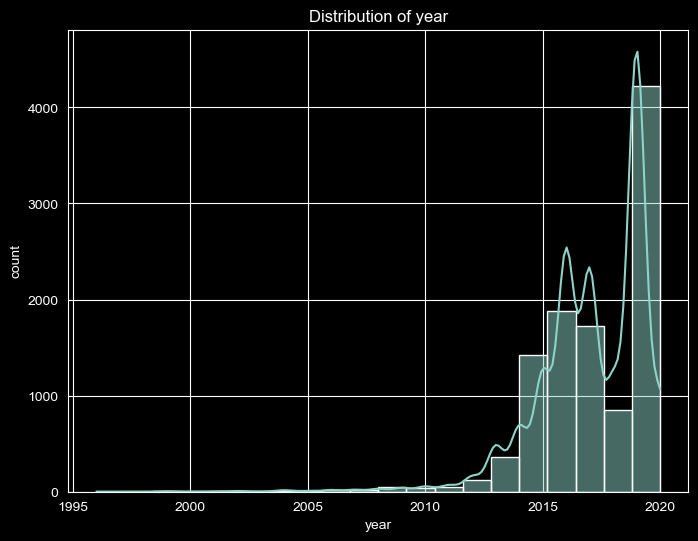

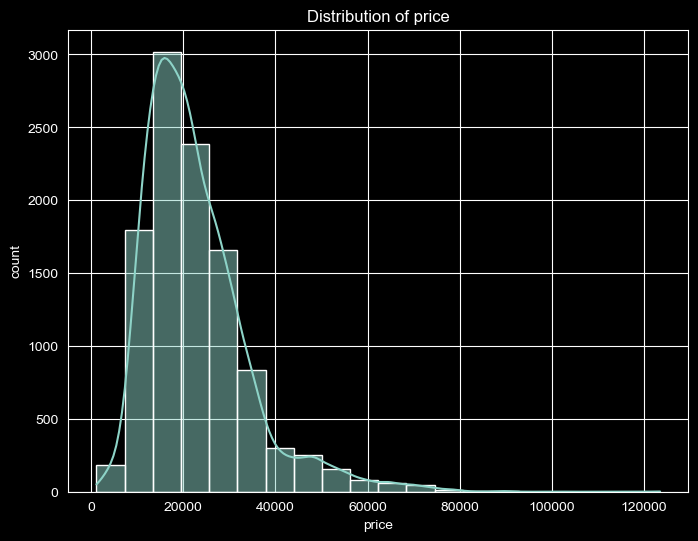

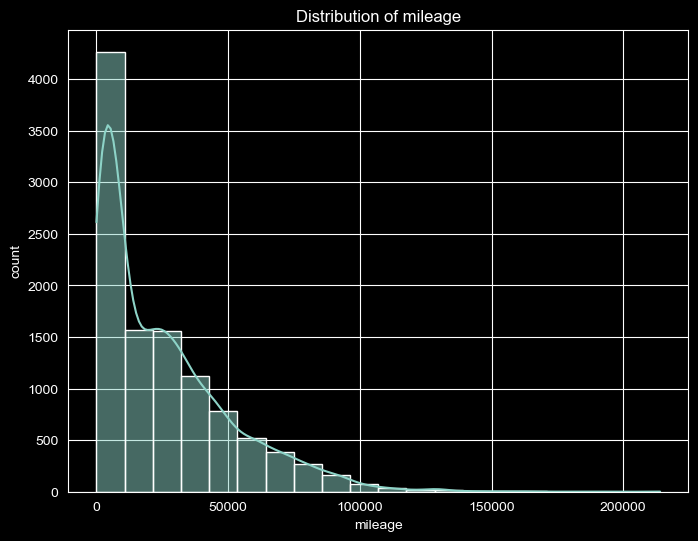

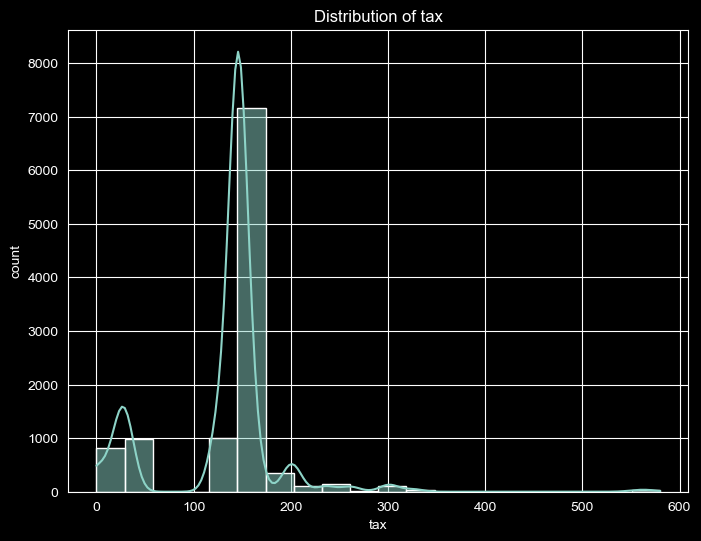

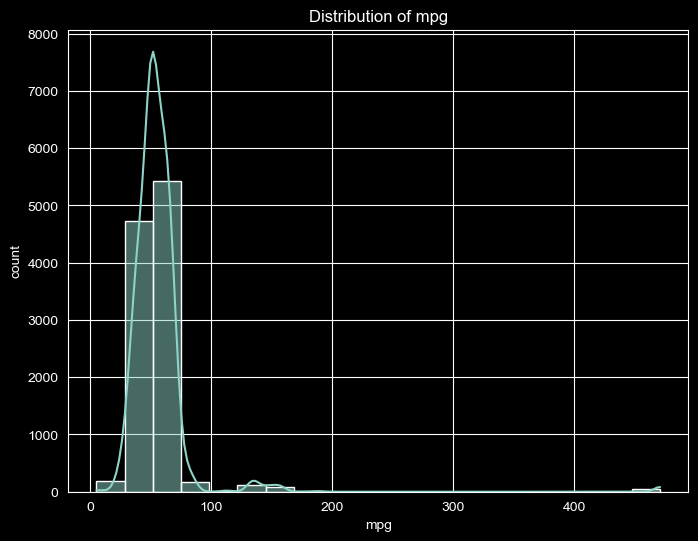

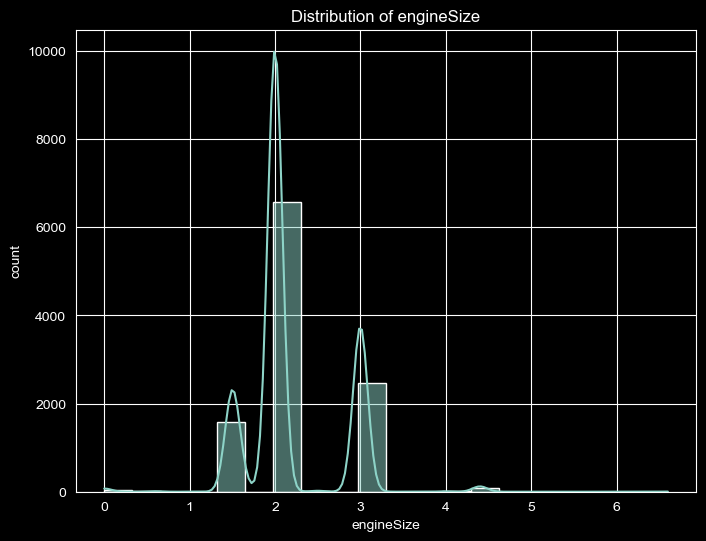

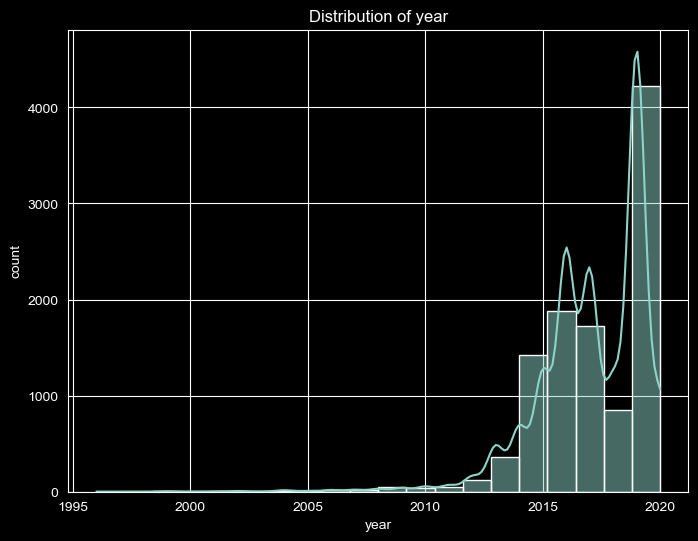

Histogram of year
year contains continuous numeric values and shows the frequency of data points.
- Primary Peak (Mode): Approximately 2019.00, where the highest density of records occurs.
- Concentration: The most frequent observations are clustered between 2016.00 and 2019.00.
- Average Value:The mean of the distribution is 2017.08.
- Data Volume: Total of 10781 observations visualized in the bins.
------------------------------


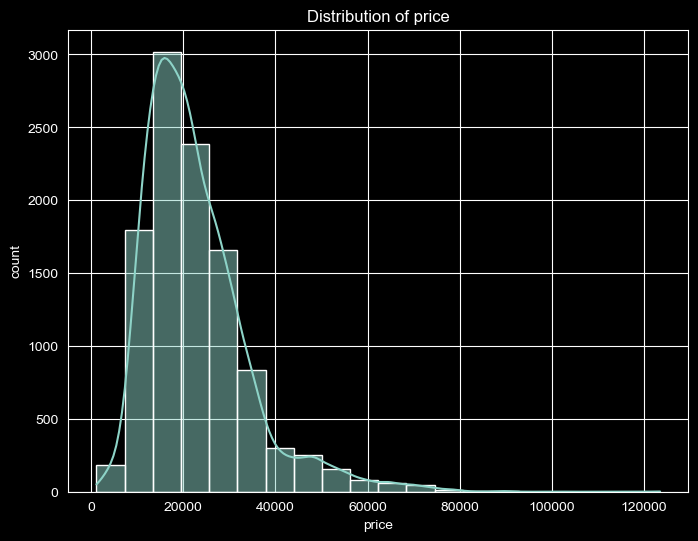

Histogram of price
price contains continuous numeric values and shows the frequency of data points.
- Primary Peak (Mode): Approximately 20980.00, where the highest density of records occurs.
- Concentration: The most frequent observations are clustered between 14950.00 and 27940.00.
- Average Value:The mean of the distribution is 22733.41.
- Data Volume: Total of 10781 observations visualized in the bins.
------------------------------


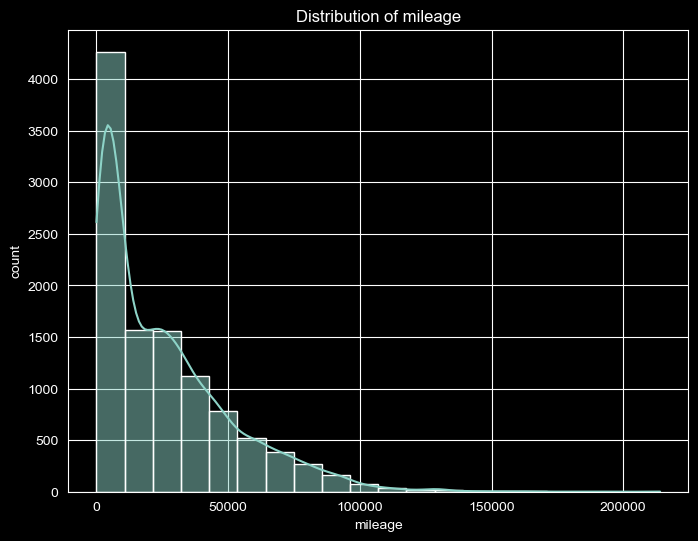

Histogram of mileage
mileage contains continuous numeric values and shows the frequency of data points.
- Primary Peak (Mode): Approximately 123.00, where the highest density of records occurs.
- Concentration: The most frequent observations are clustered between 5529.00 and 38206.00.
- Average Value:The mean of the distribution is 25496.99.
- Data Volume: Total of 10781 observations visualized in the bins.
------------------------------


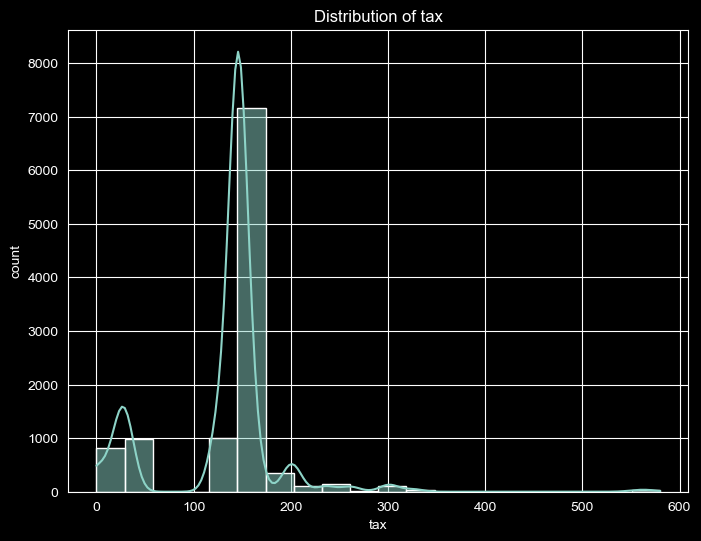

Histogram of tax
tax contains continuous numeric values and shows the frequency of data points.
- Primary Peak (Mode): Approximately 145.00, where the highest density of records occurs.
- Concentration: The most frequent observations are clustered between 135.00 and 145.00.
- Average Value:The mean of the distribution is 131.70.
- Data Volume: Total of 10781 observations visualized in the bins.
------------------------------


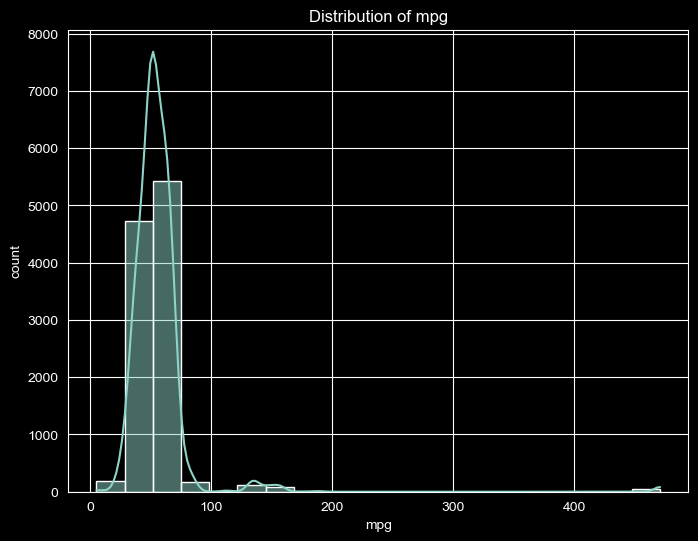

Histogram of mpg
mpg contains continuous numeric values and shows the frequency of data points.
- Primary Peak (Mode): Approximately 65.70, where the highest density of records occurs.
- Concentration: The most frequent observations are clustered between 45.60 and 62.80.
- Average Value:The mean of the distribution is 56.40.
- Data Volume: Total of 10781 observations visualized in the bins.
------------------------------


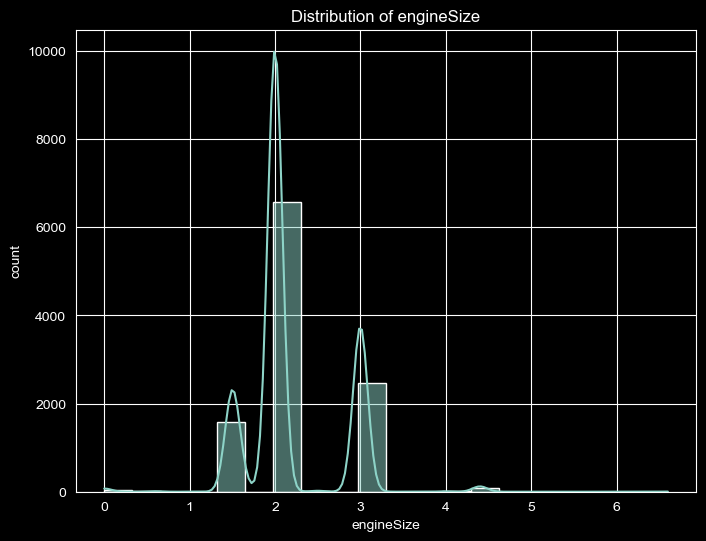

Histogram of engineSize
engineSize contains continuous numeric values and shows the frequency of data points.
- Primary Peak (Mode): Approximately 2.00, where the highest density of records occurs.
- Concentration: The most frequent observations are clustered between 2.00 and 2.00.
- Average Value:The mean of the distribution is 2.17.
- Data Volume: Total of 10781 observations visualized in the bins.
------------------------------


In [10]:
for cols in num_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df[cols],bins=20,kde=True)
    plt.title(f'Distribution of {cols}')
    plt.xlabel(f'{cols}')
    plt.ylabel('count')
    plt.show()


    import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for cols in num_cols:
    # 1. Visualization
    plt.figure(figsize=(8,6))
    sns.histplot(data=df[cols], bins=20, kde=True)
    plt.title(f'Distribution of {cols}')
    plt.xlabel(f'{cols}')
    plt.ylabel('count')
    plt.show()

    # 2. Calculate Histogram Metrics
    # We find the 'mode' (the peak) and the mean to describe the concentration
    mode_val = df[cols].mode()[0]
    mean_val = df[cols].mean()
    total_count = len(df[cols].dropna())

    # Using 25th and 75th percentiles to describe the "bulk" of the histogram
    lower_bulk = df[cols].quantile(0.25)
    upper_bulk = df[cols].quantile(0.75)

    # 3. Generate Markdown
    markdown = (
        f"Histogram of {cols}\n"
        f"{cols} contains continuous numeric values and shows the frequency of data points.\n"
        f"- Primary Peak (Mode): Approximately {mode_val:.2f}, where the highest density of records occurs.\n"
        f"- Concentration: The most frequent observations are clustered between {lower_bulk:.2f} and {upper_bulk:.2f}.\n"
        f"- Average Value:The mean of the distribution is {mean_val:.2f}.\n"
        f"- Data Volume: Total of {total_count} observations visualized in the bins."
    )

    print(markdown)
    print("-" * 30)



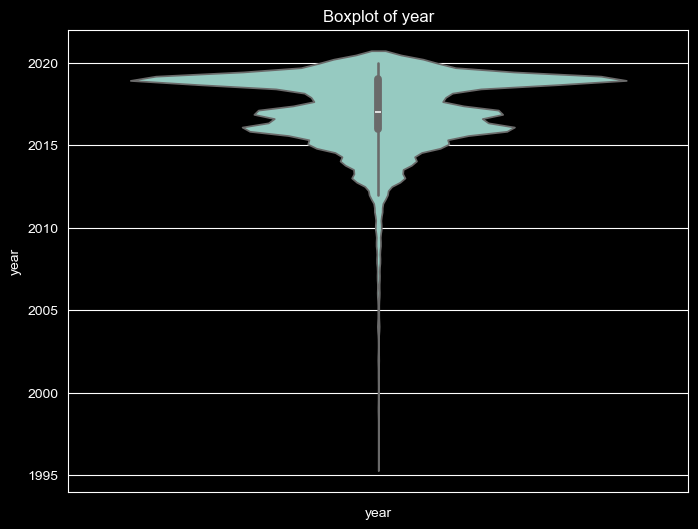

Violin plot of year
The variable year contains continuous numeric values.
- Skewness:-1.79 (left-skewed).
- Most frequent range (middle 50%):2016.00 to 2019.00.
- Spread (IQR):3.00.
- Outliers detected: 213.

------------------------------


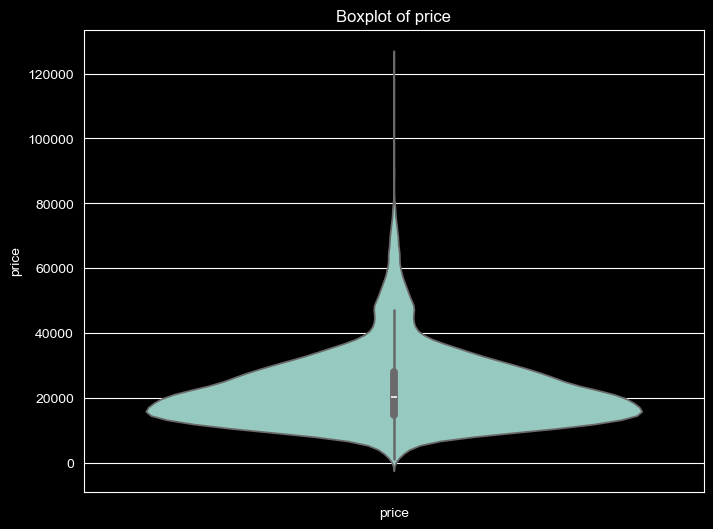

Violin plot of price
The variable price contains continuous numeric values.
- Skewness:1.59 (right-skewed).
- Most frequent range (middle 50%):14950.00 to 27940.00.
- Spread (IQR):12990.00.
- Outliers detected: 484.

------------------------------


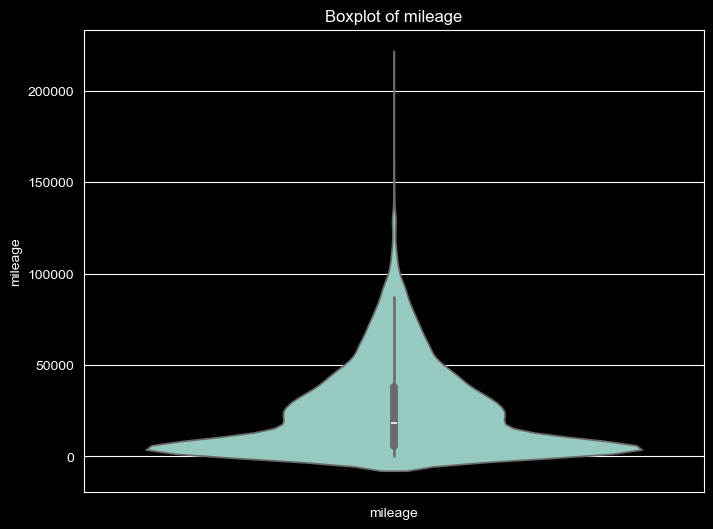

Violin plot of mileage
The variable mileage contains continuous numeric values.
- Skewness:1.38 (right-skewed).
- Most frequent range (middle 50%):5529.00 to 38206.00.
- Spread (IQR):32677.00.
- Outliers detected: 296.

------------------------------


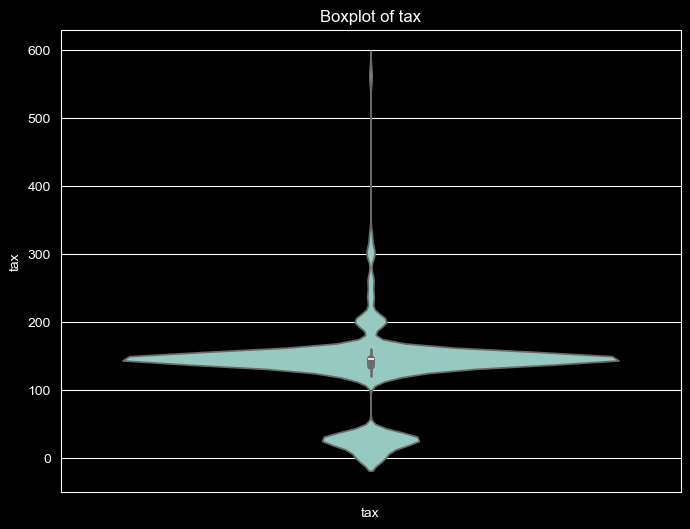

Violin plot of tax
The variable tax contains continuous numeric values.
- Skewness:0.83 (right-skewed).
- Most frequent range (middle 50%):135.00 to 145.00.
- Spread (IQR):10.00.
- Outliers detected: 2733.

------------------------------


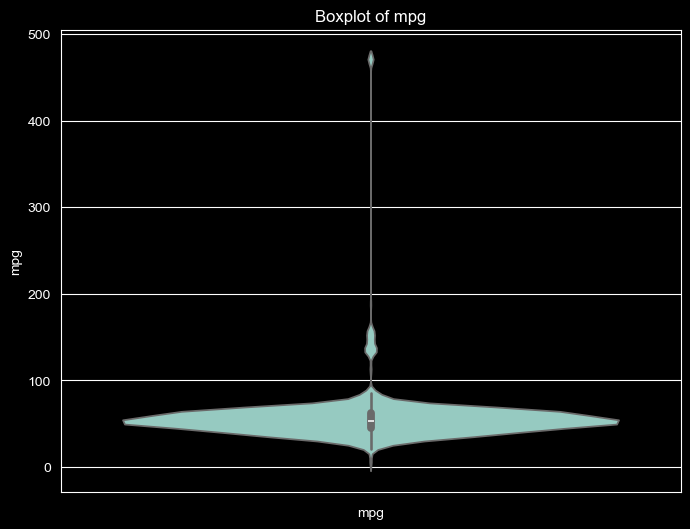

Violin plot of mpg
The variable mpg contains continuous numeric values.
- Skewness:9.63 (right-skewed).
- Most frequent range (middle 50%):45.60 to 62.80.
- Spread (IQR):17.20.
- Outliers detected: 275.

------------------------------


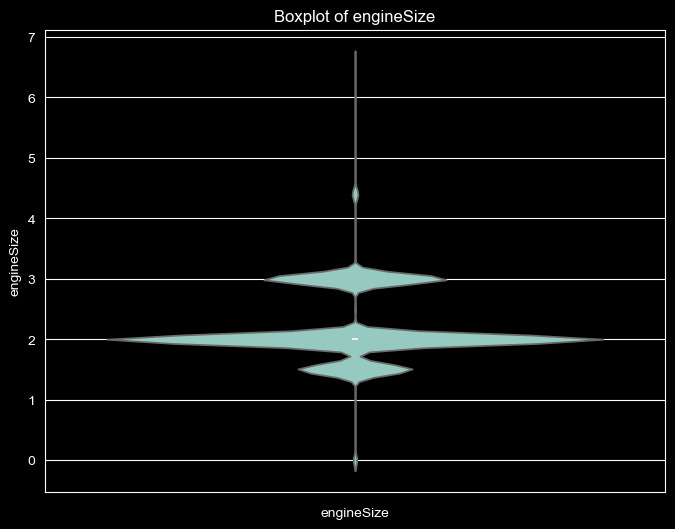

Violin plot of engineSize
The variable engineSize contains continuous numeric values.
- Skewness:0.85 (right-skewed).
- Most frequent range (middle 50%):2.00 to 2.00.
- Spread (IQR):0.00.
- Outliers detected: 4206.

------------------------------


In [11]:
# Box plot for all numerical features
for cols in num_cols:
    # 1. Visualization
    plt.figure(figsize=(8,6))
    sns.violinplot(df[cols]) # Added x= for better compatibility
    plt.title(f'Boxplot of {cols}')
    plt.xlabel(f'{cols}')
    plt.show() # Ensures plot displays before markdown

    # 2. Statistical Calculations
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers_count = df[(df[cols] < lower) | (df[cols] > upper)][cols].count()

    # Calculate skewness for the current column
    skewness = df[cols].skew()

    # 3. Markdown Generation
    markdown = (
        f"Violin plot of {cols}\n"
        f"The variable {cols} contains continuous numeric values.\n"
        f"- Skewness:{skewness:.2f} "
        f"({'right-skewed' if skewness > 0 else 'left-skewed' if skewness < 0 else 'Approximately symmetric'}).\n"
        f"- Most frequent range (middle 50%):{q1:.2f} to {q3:.2f}.\n"
        f"- Spread (IQR):{iqr:.2f}.\n"
        f"- Outliers detected: {outliers_count}.\n"
    )

    print(markdown)
    print("-" * 30)


In [12]:
#descriptive stats for categorical columns
for cols in cat_cols:
    desc=df[cols].describe()
    markdown=(
        f"Descriptive Statistics of {cols}\n"
        f"Count: {desc['count']:.2f}\n"
        f"Unique Values:{desc['unique']:.2f}\n"
        f"Most Frequent: {desc['top']}\n"
        f"Frequency of Most Frequent Class: {desc['freq']}\n"

        f"----------------------------------------"
    )
    print(markdown)


Descriptive Statistics of model
Count: 10781.00
Unique Values:24.00
Most Frequent:  3 Series
Frequency of Most Frequent Class: 2443
----------------------------------------
Descriptive Statistics of transmission
Count: 10781.00
Unique Values:3.00
Most Frequent: Semi-Auto
Frequency of Most Frequent Class: 4666
----------------------------------------
Descriptive Statistics of fuelType
Count: 10781.00
Unique Values:5.00
Most Frequent: Diesel
Frequency of Most Frequent Class: 7027
----------------------------------------


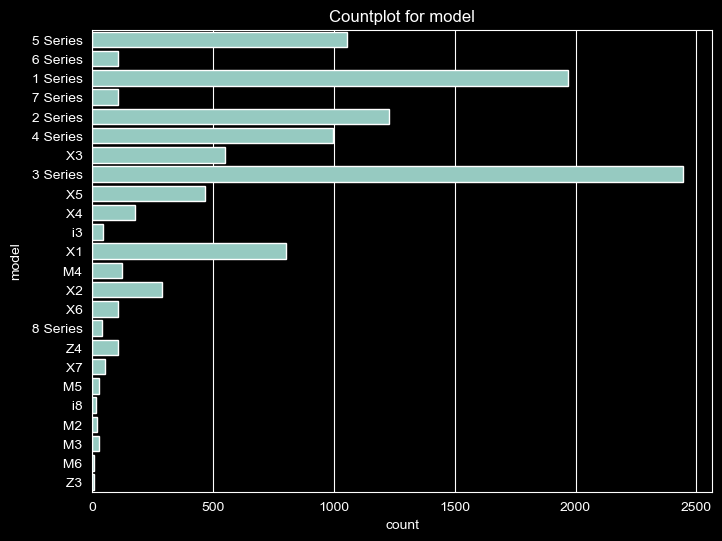

Interpretation of Count plot for model
model column has categorical values with 24 unique values.
-Most Frequent Category: 3 Series with 2443 unique values.
-Least Frequent Category: Z3 with 7 unique values.
percentage of most frequently repeated class:22.66 so the column is Lowly Imbalanced
Total number of observations: 10781.

--------------------------------------------------


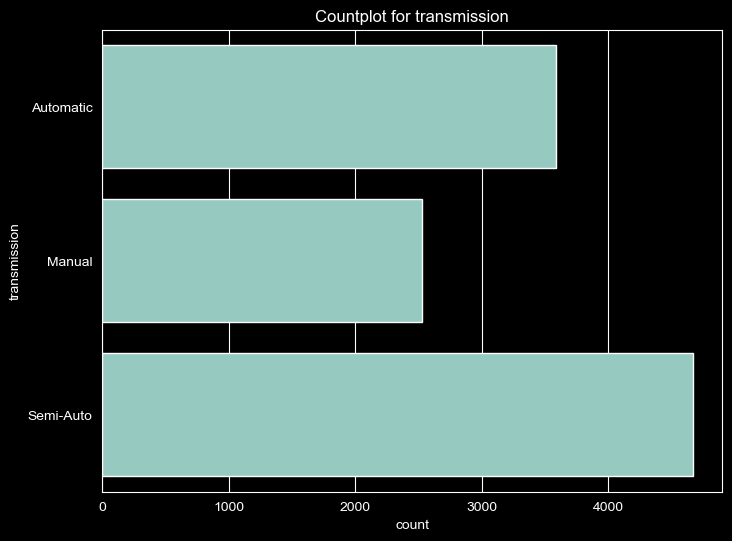

Interpretation of Count plot for transmission
transmission column has categorical values with 3 unique values.
-Most Frequent Category:Semi-Auto with 4666 unique values.
-Least Frequent Category:Manual with 2527 unique values.
percentage of most frequently repeated class:43.28 so the column is Mediumly Imbalanced
Total number of observations: 10781.

--------------------------------------------------


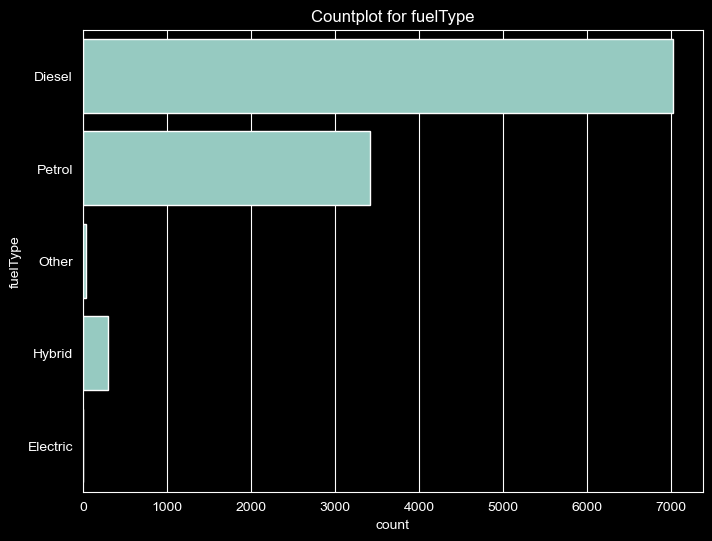

Interpretation of Count plot for fuelType
fuelType column has categorical values with 5 unique values.
-Most Frequent Category:Diesel with 7027 unique values.
-Least Frequent Category:Electric with 3 unique values.
percentage of most frequently repeated class:65.18 so the column is Highly Imbalanced
Total number of observations: 10781.

--------------------------------------------------


In [13]:
#univariate analysis for categorical columns
for cols in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(df[cols])
    plt.title(f'Countplot for {cols}')
    plt.show()

    #calculating count ,unique value count
    count=df[cols].value_counts()
    unique_values=df[cols].nunique()
    total_count=len(df[cols].dropna())

    #calculating mode and least repeated in each col
    mode=count.index[0]
    mode_count=count.iloc[0]
    min=count.index[-1]
    min_count=count.iloc[-1]

    #checking class imbalance
    percentage=(mode_count/total_count)*100
    if percentage>50:
        balance_status='Highly Imbalanced'
    elif percentage>25:
        balance_status='Mediumly Imbalanced'
    else:
        balance_status='Lowly Imbalanced'
    #markdown
    markdown = (
        f"Interpretation of Count plot for {cols}\n"
        f"{cols} column has categorical values with {unique_values} unique values.\n"
        f"-Most Frequent Category:{mode} with {mode_count} unique values.\n"
        f"-Least Frequent Category:{min} with {min_count} unique values.\n"
        f"percentage of most frequently repeated class:{percentage:.2f} so the column is {balance_status}\n"
        f"Total number of observations: {total_count}.\n"

    )
    print(markdown)
    print("-" * 50)



BIVARAITE ANALYSIS


In [14]:
#first analyzing columns
df.head(50)
value=df['model'].value_counts()
print(value)

model
3 Series    2443
1 Series    1969
2 Series    1229
5 Series    1056
4 Series     995
X1           804
X3           551
X5           468
X2           288
X4           179
M4           125
6 Series     108
Z4           108
7 Series     106
X6           106
X7            55
i3            43
8 Series      39
M5            29
M3            27
M2            21
i8            17
M6             8
Z3             7
Name: count, dtype: int64


In [15]:
print(df['model'].isna().sum())

0


In [16]:
# Updated mapping dictionary including the 4 Series
model_mapping = {
    # Compact / Hatchback
    ' 1 Series': 'Compact/Hatch', ' 2 Series': 'Compact/Hatch',

    # Sedan / Saloon
    ' 3 Series': 'Sedan/Saloon', ' 5 Series': 'Sedan/Saloon',
    ' 6 Series': 'Sedan/Saloon', ' 7 Series': 'Sedan/Saloon',
    ' 8 Series': 'Sedan/Saloon',

    # Coupe / Gran Coupe (Adding 4 Series here)
    ' 4 Series': 'Sedan/Saloon', # Or create a 'Coupe/GC' group if you prefer

    # SUV (X Series)
    ' X1': 'SUV (X Series)', ' X2': 'SUV (X Series)', ' X3': 'SUV (X Series)',
    ' X4': 'SUV (X Series)', ' X5': 'SUV (X Series)', ' X6': 'SUV (X Series)',
    ' X7': 'SUV (X Series)',

    # Performance (M)
    ' M2': 'Performance (M)', ' M3': 'Performance (M)', ' M4': 'Performance (M)',
    ' M5': 'Performance (M)', ' M6': 'Performance (M)',

    # Electric/Hybrid
    ' i3': 'Electric/Hybrid', ' i8': 'Electric/Hybrid',

    # Roadsters
    ' Z3': 'Roadster', ' Z4': 'Roadster'
}

# Apply the mapping again
df['model_group'] = df['model'].map(model_mapping)

# Check again - should be 0 now
print(f"Missing in model_group: {df['model_group'].isna().sum()}")

Missing in model_group: 0


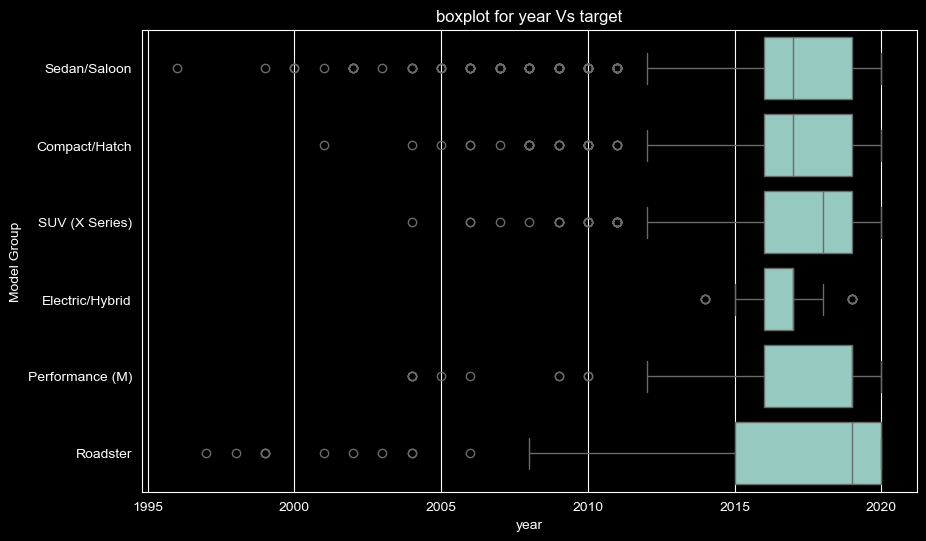

### 📊 Bivariate Analysis: year vs model_group
**1. Distribution Shape (Skewness: -1.79)**
The data is Left-skewed. This means the group is dominated by higher year values.

**2. The Typical Car (Middle 50%)**
The 'Heart of the Market' for year sits between **2016.00 and 2019.00**. Most buyers will find their vehicle within this 3.00 unit spread.

**3. Consistency & Outliers**
We detected **213 outliers**. These represent unique, high-end or specialized versions that deviate from the standard lineup.

----------------------------------------


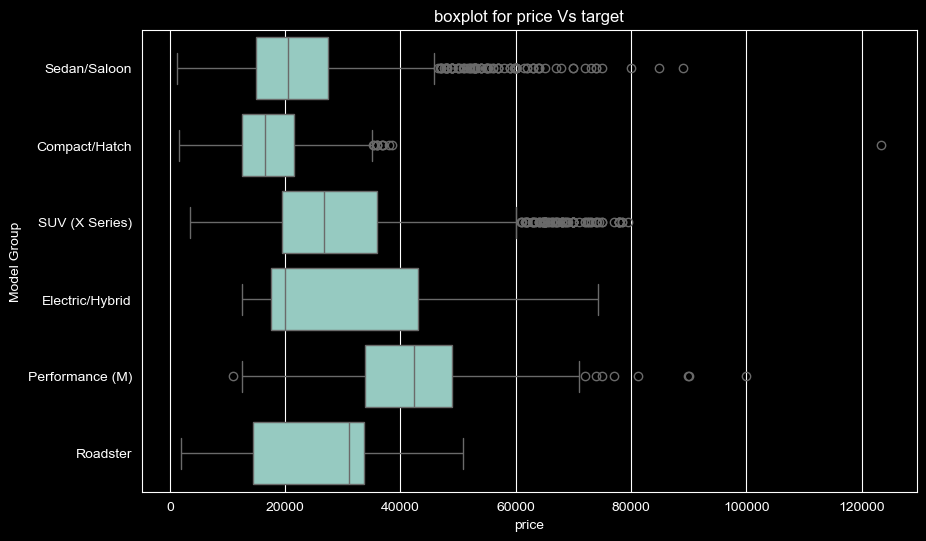

### 📊 Bivariate Analysis: price vs model_group
**1. Distribution Shape (Skewness: 1.59)**
The data is Right-skewed. This means the group is dominated by lower price values.

**2. The Typical Car (Middle 50%)**
The 'Heart of the Market' for price sits between **14950.00 and 27940.00**. Most buyers will find their vehicle within this 12990.00 unit spread.

**3. Consistency & Outliers**
We detected **484 outliers**. These represent unique, high-end or specialized versions that deviate from the standard lineup.

----------------------------------------


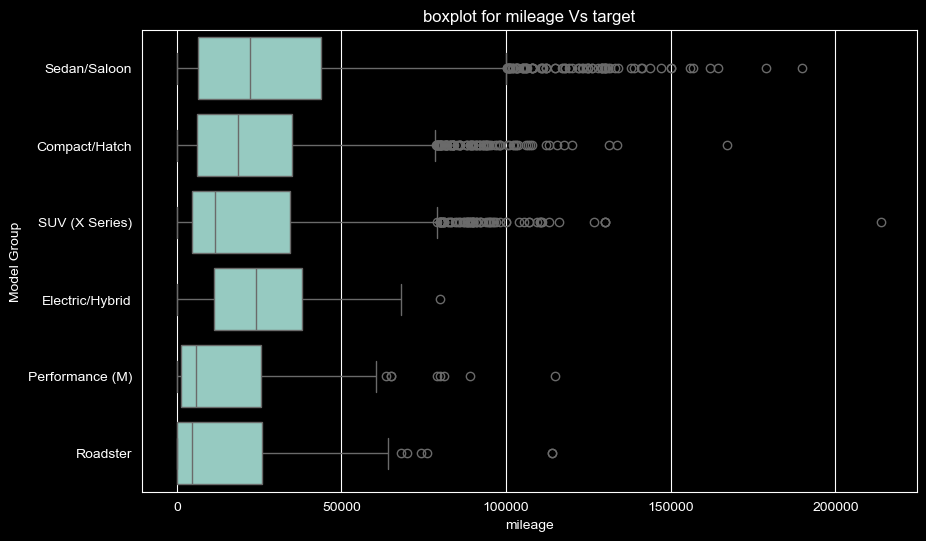

### 📊 Bivariate Analysis: mileage vs model_group
**1. Distribution Shape (Skewness: 1.38)**
The data is Right-skewed. This means the group is dominated by lower mileage values.

**2. The Typical Car (Middle 50%)**
The 'Heart of the Market' for mileage sits between **5529.00 and 38206.00**. Most buyers will find their vehicle within this 32677.00 unit spread.

**3. Consistency & Outliers**
We detected **296 outliers**. These represent unique, high-end or specialized versions that deviate from the standard lineup.

----------------------------------------


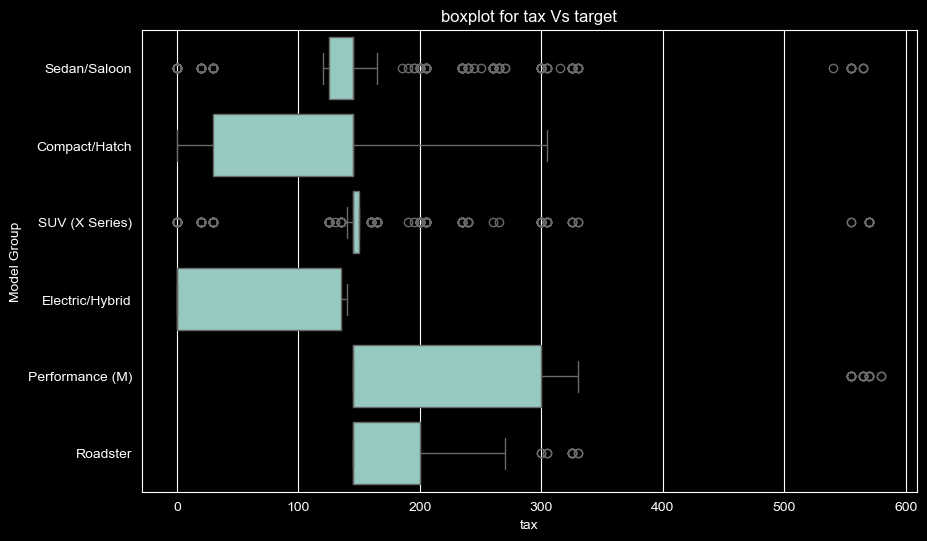

### 📊 Bivariate Analysis: tax vs model_group
**1. Distribution Shape (Skewness: 0.83)**
The data is Right-skewed. This means the group is dominated by lower tax values.

**2. The Typical Car (Middle 50%)**
The 'Heart of the Market' for tax sits between **135.00 and 145.00**. Most buyers will find their vehicle within this 10.00 unit spread.

**3. Consistency & Outliers**
We detected **2733 outliers**. These represent unique, high-end or specialized versions that deviate from the standard lineup.

----------------------------------------


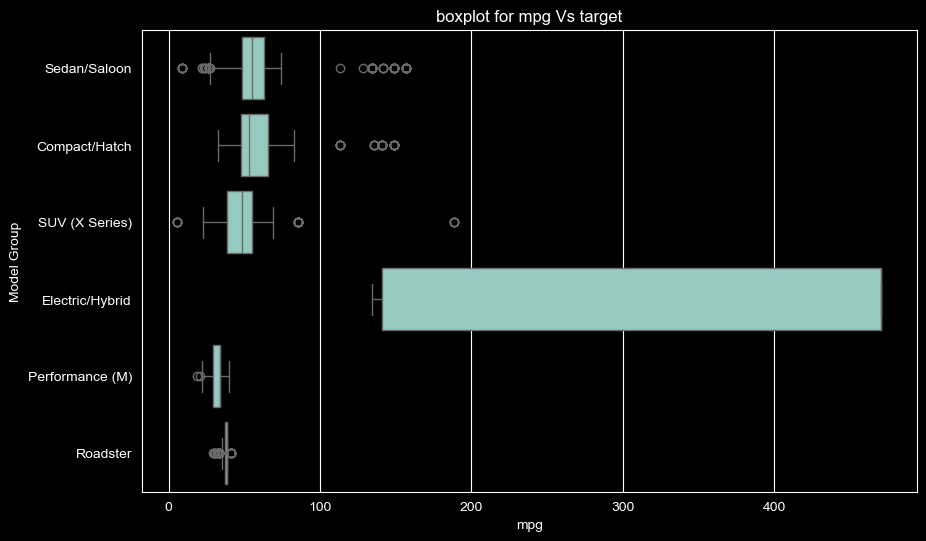

### 📊 Bivariate Analysis: mpg vs model_group
**1. Distribution Shape (Skewness: 9.63)**
The data is Right-skewed. This means the group is dominated by lower mpg values.

**2. The Typical Car (Middle 50%)**
The 'Heart of the Market' for mpg sits between **45.60 and 62.80**. Most buyers will find their vehicle within this 17.20 unit spread.

**3. Consistency & Outliers**
We detected **275 outliers**. These represent unique, high-end or specialized versions that deviate from the standard lineup.

----------------------------------------


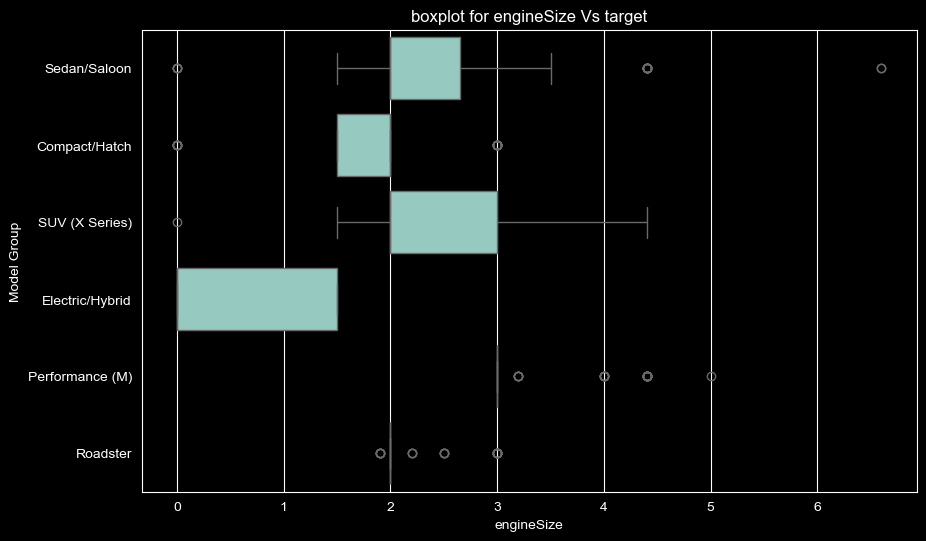

### 📊 Bivariate Analysis: engineSize vs model_group
**1. Distribution Shape (Skewness: 0.85)**
The data is Right-skewed. This means the group is dominated by lower engineSize values.

**2. The Typical Car (Middle 50%)**
The 'Heart of the Market' for engineSize sits between **2.00 and 2.00**. Most buyers will find their vehicle within this 0.00 unit spread.

**3. Consistency & Outliers**
We detected **4206 outliers**. These represent unique, high-end or specialized versions that deviate from the standard lineup.

----------------------------------------


In [17]:
#multivariate analysis for model using model_group
target='model_group'
for cols in num_cols:
    plt.figure(figsize=(10,6))
    order = df.groupby(target)[cols].median().sort_values(ascending=False).index
    sns.boxplot(data=df,x=cols,y=target)
    plt.title(f'boxplot for {cols} Vs target')
    plt.xlabel(f'{cols}')
    plt.ylabel('Model Group')
    plt.show()

    #calculations for box plot
    skewness=df[cols].skew()
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers_count = df[(df[cols] < lower) | (df[cols] > upper)][cols].count()

    markdown = (
    f"### 📊 Bivariate Analysis: {cols} vs {target}\n"
    f"**1. Distribution Shape (Skewness: {skewness:.2f})**\n"
    f"The data is {'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Symmetric'}. "
    f"This means the group is dominated by {'lower' if skewness > 0 else 'higher'} {cols} values.\n\n"

    f"**2. The Typical Car (Middle 50%)**\n"
    f"The 'Heart of the Market' for {cols} sits between **{q1:.2f} and {q3:.2f}**. "
    f"Most buyers will find their vehicle within this {iqr:.2f} unit spread.\n\n"

    f"**3. Consistency & Outliers**\n"
    f"We detected **{outliers_count} outliers**. "
    f"{'These represent unique, high-end or specialized versions that deviate from the standard lineup.' if outliers_count > 0 else 'This group is very consistent with no extreme anomalies.'}\n"
)
    print(markdown)
    print('-'*40)

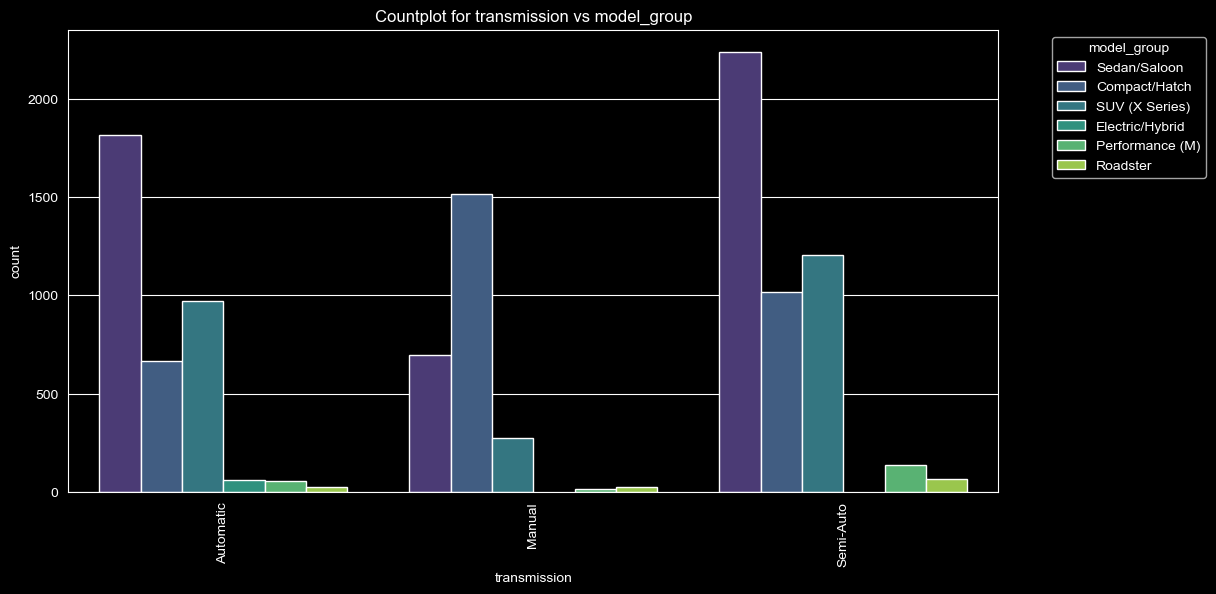

### Interpretation of Bivariate Countplot: transmission vs model_group
The `transmission` column contains categorical data with **3 unique categories**.
- **Most Frequent Category**: `Semi-Auto` (appearing 4666 times).
- **Least Frequent Category**: `Manual` (appearing 2527 times).
- **Balance Status**: 43.28% of data belongs to `Semi-Auto`, making this column **Mediumly Imbalanced**.
- **Bivariate Insight**: The plot shows how `model_group` is distributed across each `transmission`. For example, you can observe if `Semi-Auto` is dominated by a specific model group.

----------------------------------------


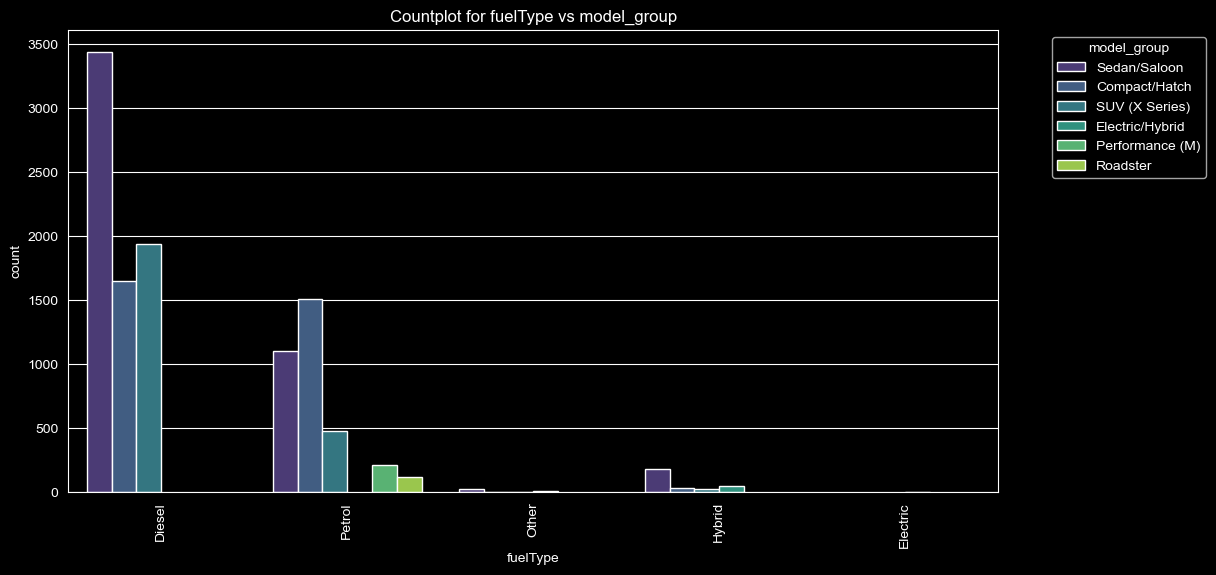

### Interpretation of Bivariate Countplot: fuelType vs model_group
The `fuelType` column contains categorical data with **5 unique categories**.
- **Most Frequent Category**: `Diesel` (appearing 7027 times).
- **Least Frequent Category**: `Electric` (appearing 3 times).
- **Balance Status**: 65.18% of data belongs to `Diesel`, making this column **Highly Imbalanced**.
- **Bivariate Insight**: The plot shows how `model_group` is distributed across each `fuelType`. For example, you can observe if `Diesel` is dominated by a specific model group.

----------------------------------------


In [18]:

categroical_Cols=['transmission','fuelType']
target = 'model_group'

for col in categroical_Cols:
    plt.figure(figsize=(12, 6))

    # Bivariate Countplot: x is our feature, hue is our grouped target
    sns.countplot(data=df, x=col, hue=target, palette='viridis')
    plt.title(f'Countplot for {col} vs {target}')
    plt.xticks(rotation=90)
    plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Calculations for the Feature Column (col)
    count_series = df[col].value_counts()
    unique_values = df[col].nunique()
    total_count = len(df[col].dropna())

    mode_val = count_series.index[0]
    mode_count = count_series.iloc[0]
    least_val = count_series.index[-1]
    least_count = count_series.iloc[-1]

    # Class Imbalance Check
    percentage = (mode_count / total_count) * 100
    if percentage > 50:
        balance_status = 'Highly Imbalanced'
    elif percentage > 25:
        balance_status = 'Mediumly Imbalanced'
    else:
        balance_status = 'Lowly Imbalanced'

    # Markdown Generation
    markdown = (
        f"### Interpretation of Bivariate Countplot: {col} vs {target}\n"
        f"The `{col}` column contains categorical data with **{unique_values} unique categories**.\n"
        f"- **Most Frequent Category**: `{mode_val}` (appearing {mode_count} times).\n"
        f"- **Least Frequent Category**: `{least_val}` (appearing {least_count} times).\n"
        f"- **Balance Status**: {percentage:.2f}% of data belongs to `{mode_val}`, making this column **{balance_status}**.\n"
        f"- **Bivariate Insight**: The plot shows how `{target}` is distributed across each `{col}`. "
        f"For example, you can observe if `{mode_val}` is dominated by a specific model group.\n"
    )
    print(markdown)
    print('-' * 40)



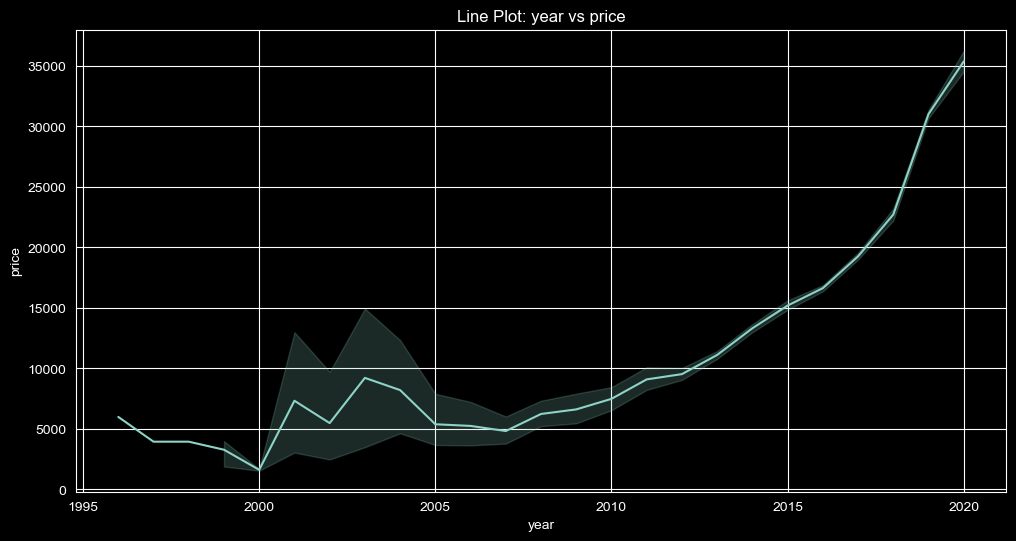

### Interpretation of Line Plot: year vs price
- `year` is a numerical feature with values ranging from **1996.00** to **2020.00**.
- The average value of `year` is **2017.08**.
- The correlation between `year` and `price` is **0.62**, indicating a **Moderate relationship**.
- The line plot shows how `price` changes as `year` varies.
- This plot helps in identifying trends, outliers, and price sensitivity with respect to `year`.

----------------------------------------


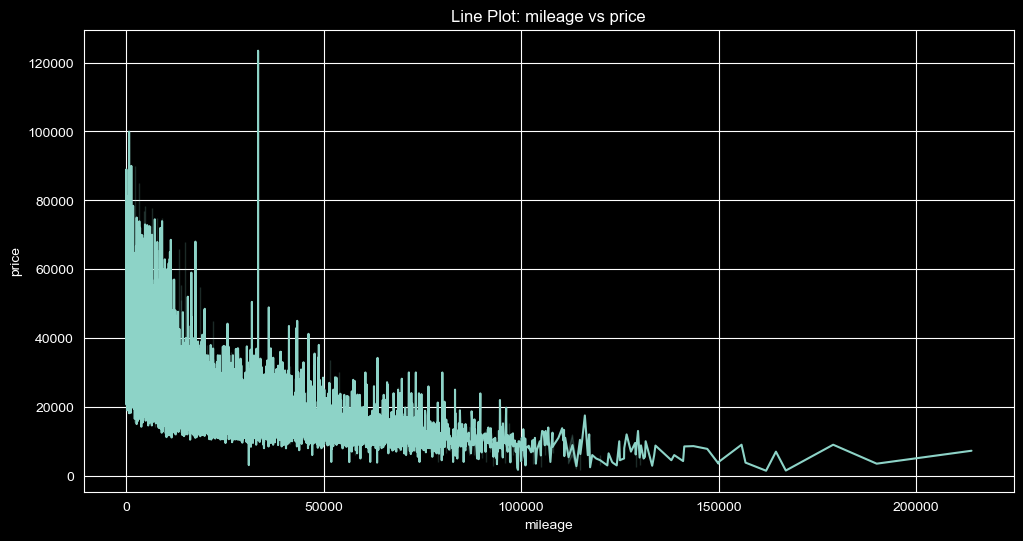

### Interpretation of Line Plot: mileage vs price
- `mileage` is a numerical feature with values ranging from **1.00** to **214000.00**.
- The average value of `mileage` is **25496.99**.
- The correlation between `mileage` and `price` is **-0.61**, indicating a **Moderate relationship**.
- The line plot shows how `price` changes as `mileage` varies.
- This plot helps in identifying trends, outliers, and price sensitivity with respect to `mileage`.

----------------------------------------


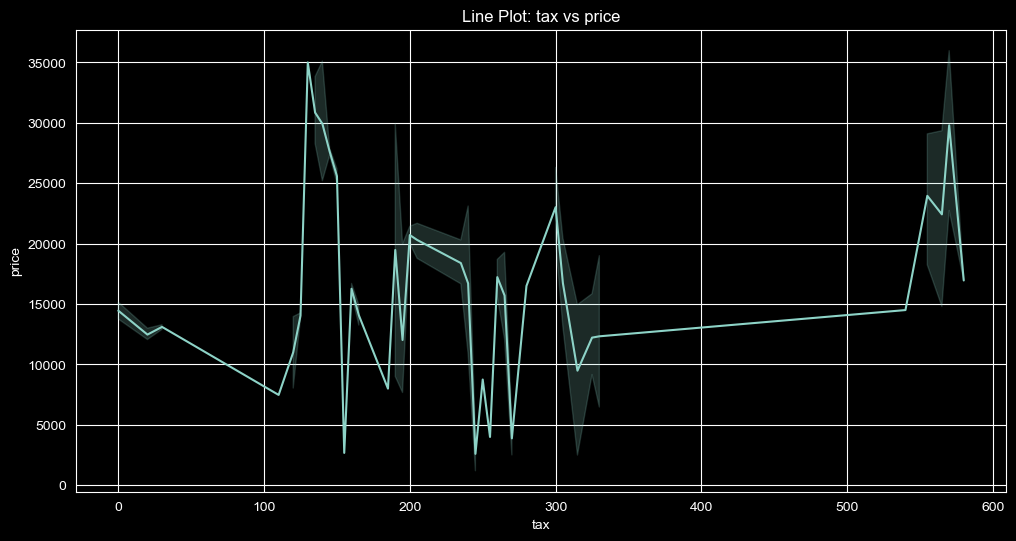

### Interpretation of Line Plot: tax vs price
- `tax` is a numerical feature with values ranging from **0.00** to **580.00**.
- The average value of `tax` is **131.70**.
- The correlation between `tax` and `price` is **0.26**, indicating a **Weak relationship**.
- The line plot shows how `price` changes as `tax` varies.
- This plot helps in identifying trends, outliers, and price sensitivity with respect to `tax`.

----------------------------------------


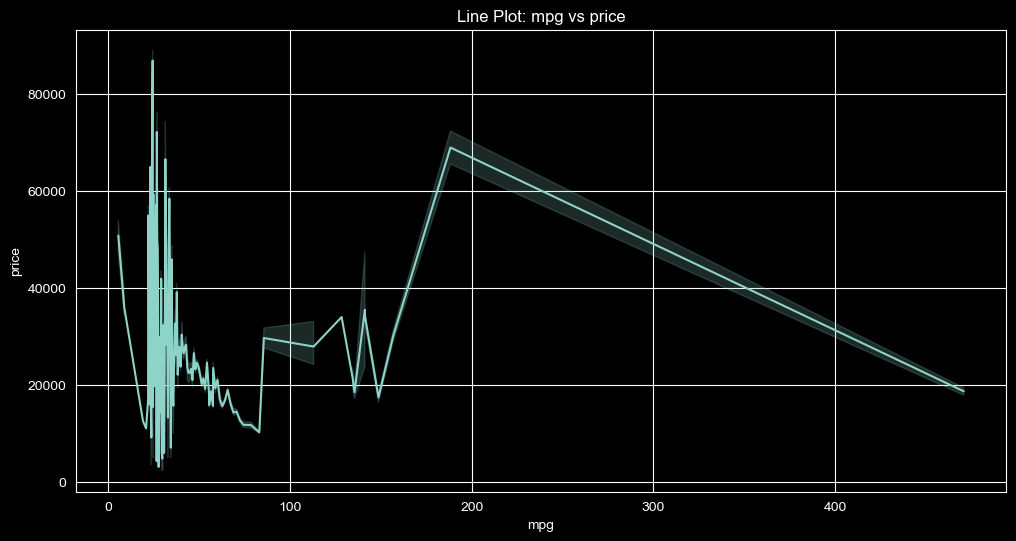

### Interpretation of Line Plot: mpg vs price
- `mpg` is a numerical feature with values ranging from **5.50** to **470.80**.
- The average value of `mpg` is **56.40**.
- The correlation between `mpg` and `price` is **-0.20**, indicating a **Weak relationship**.
- The line plot shows how `price` changes as `mpg` varies.
- This plot helps in identifying trends, outliers, and price sensitivity with respect to `mpg`.

----------------------------------------


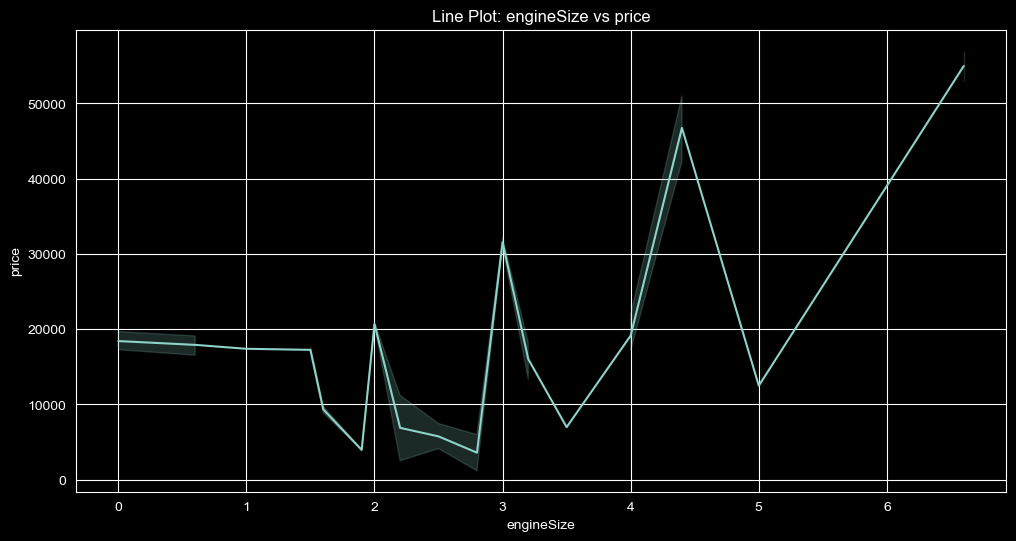

### Interpretation of Line Plot: engineSize vs price
- `engineSize` is a numerical feature with values ranging from **0.00** to **6.60**.
- The average value of `engineSize` is **2.17**.
- The correlation between `engineSize` and `price` is **0.46**, indicating a **Moderate relationship**.
- The line plot shows how `price` changes as `engineSize` varies.
- This plot helps in identifying trends, outliers, and price sensitivity with respect to `engineSize`.

----------------------------------------


In [19]:
target = 'price'

for col in num_cols:
    if col == target:
        continue

    # Line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=col, y=target)
    plt.title(f'Line Plot: {col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

    # Basic statistics
    corr = df[col].corr(df[target])
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()

    # Relationship strength
    if abs(corr) >= 0.7:
        relation = 'Strong'
    elif abs(corr) >= 0.3:
        relation = 'Moderate'
    else:
        relation = 'Weak'

    # Markdown generation
    markdown = (
        f"### Interpretation of Line Plot: {col} vs {target}\n"
        f"- `{col}` is a numerical feature with values ranging from **{min_val:.2f}** to **{max_val:.2f}**.\n"
        f"- The average value of `{col}` is **{mean_val:.2f}**.\n"
        f"- The correlation between `{col}` and `{target}` is **{corr:.2f}**, indicating a **{relation} relationship**.\n"
        f"- The line plot shows how `{target}` changes as `{col}` varies.\n"
        f"- This plot helps in identifying trends, outliers, and price sensitivity with respect to `{col}`.\n"
    )

    print(markdown)
    print('-' * 40)


MULTIVARIATE ANALYSIS

In [20]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_group
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Sedan/Saloon
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Sedan/Saloon
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,Sedan/Saloon
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,Compact/Hatch
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,Sedan/Saloon


In [21]:
print(num_cols)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


In [22]:
print(cat_cols)

Index(['model', 'transmission', 'fuelType'], dtype='object')


In [23]:
print(df['model'].value_counts())

model
3 Series    2443
1 Series    1969
2 Series    1229
5 Series    1056
4 Series     995
X1           804
X3           551
X5           468
X2           288
X4           179
M4           125
6 Series     108
Z4           108
7 Series     106
X6           106
X7            55
i3            43
8 Series      39
M5            29
M3            27
M2            21
i8            17
M6             8
Z3             7
Name: count, dtype: int64


In [24]:
#encoding cat column to genrate heatmap
#for fuel type
df['fuelType_encoded'] = df['fuelType'].astype('category').cat.codes
#for transmission
df['transmission_encoded'] = df['transmission'].astype('category').cat.codes
#fro model
df['model_encoded'] = df['model'].astype('category').cat.codes



<Axes: >

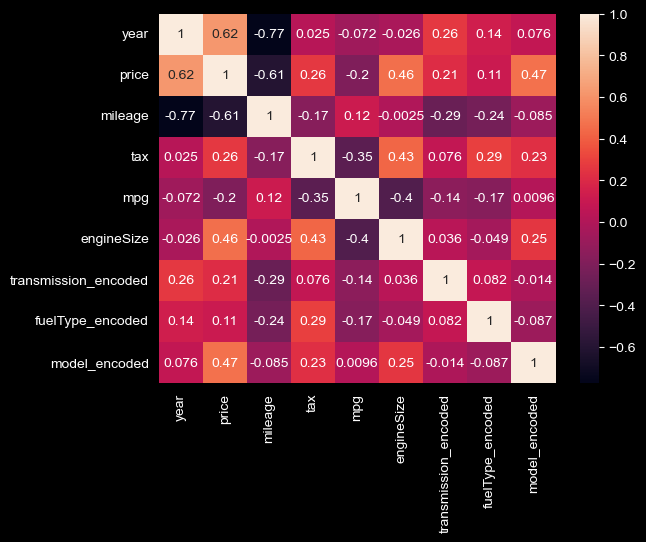

In [25]:
#heatmap
cols = ['year','price','mileage','tax','mpg','engineSize',
        'transmission_encoded','fuelType_encoded','model_encoded']

corr = df[cols].corr()
sns.heatmap(corr, annot=True)

In [26]:
#ranking correaltion to get strongest pairs
corr_matrix=df[cols].corr().abs()
corr_pairs=(
    corr_matrix.where(~np.tril(np.ones(corr_matrix.shape,dtype=bool)))
    .stack()
    .reset_index()
    .rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'})
)

#sorting correlation
corr_pair=corr_pairs.sort_values(by='Correlation',ascending=False)

#print
print(corr_pairs.head(20))

   Feature_1             Feature_2  Correlation
0       year                 price     0.623756
1       year               mileage     0.774382
2       year                   tax     0.025200
3       year                   mpg     0.071762
4       year            engineSize     0.026337
5       year  transmission_encoded     0.264386
6       year      fuelType_encoded     0.139643
7       year         model_encoded     0.076053
8      price               mileage     0.605397
9      price                   tax     0.263484
10     price                   mpg     0.204882
11     price            engineSize     0.460196
12     price  transmission_encoded     0.212334
13     price      fuelType_encoded     0.106889
14     price         model_encoded     0.467866
15   mileage                   tax     0.170747
16   mileage                   mpg     0.118609
17   mileage            engineSize     0.002540
18   mileage  transmission_encoded     0.291822
19   mileage      fuelType_encoded     0

In [27]:
#generating pairplot
#selecting cols woth highest corr or higher thna 0.45
threshold = 0.45  # only strong correlations

top_features = pd.unique(
    corr_pairs[corr_pairs['Correlation'] >= threshold][['Feature_1','Feature_2']].values.ravel()
).tolist()
print("\nColumns selected for pair plot:", top_features)


Columns selected for pair plot: ['year', 'price', 'mileage', 'engineSize', 'model_encoded']


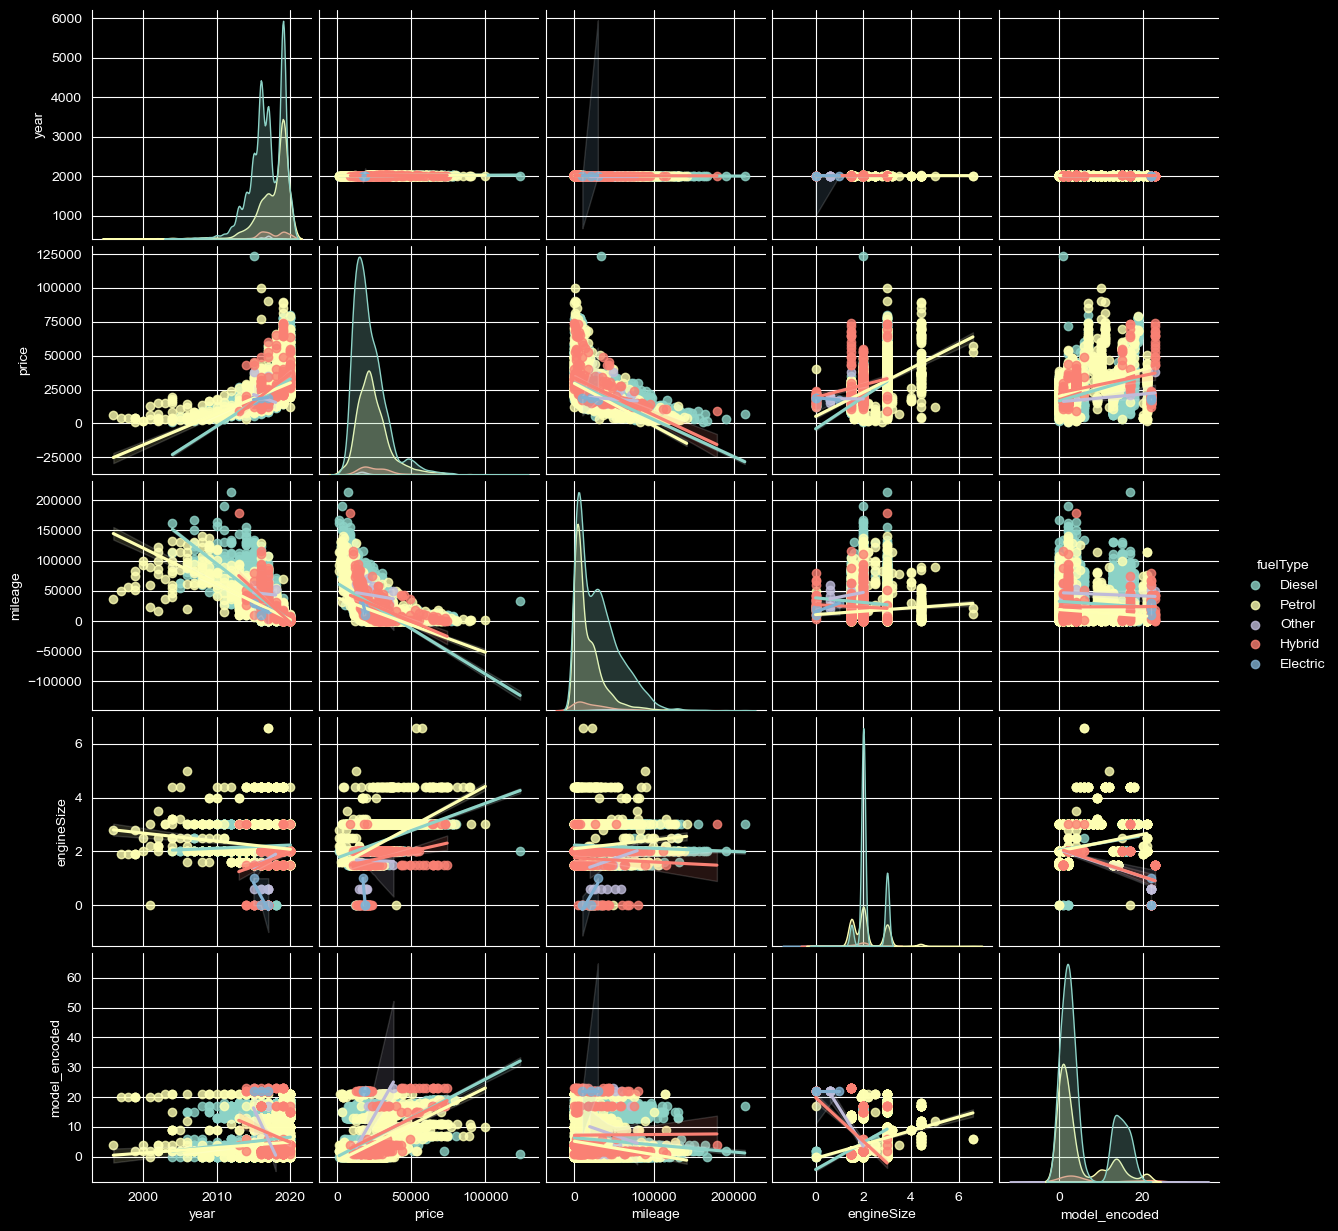

In [28]:
#generating pair plot
sns.pairplot(df[top_features +['fuelType']], hue='fuelType', diag_kind='kde',kind='reg')



In [29]:
#moving to implementing linear regression
#first defining x and then y (target)
if 'price' in df.columns:
    X= df.drop(['price'], axis=1)
y = df['price']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#pipeline for data cleaning and encoding
 #creating sub pipelines

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_Transformer=Pipeline(steps=[
     ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
     ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
num_cols = [col for col in num_cols if col != 'price']
 #combining them to one
preprocessor=ColumnTransformer(
     transformers=[
         ('num',numeric_transformer,num_cols),
         ('cat',categorical_Transformer,cat_cols)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
required_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
missing_cols = [col for col in required_cols if col not in df.columns]
print(f"Missing columns: {missing_cols}")


Missing columns: []


In [46]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
#fit the model or train
model_pipeline.fit(X_train,y_train)

#predict
y_pred=model_pipeline.predict(X_test)

#print accuracy and all
print("----MODEL PERFORMANCE REPORT----")

# FIX 3: Compare your predictions (y_pred) to the actual test answers (y_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

----MODEL PERFORMANCE REPORT----
R2 Score: 0.8598
Mean Absolute Error: 2821.9911
Mean Absolute Percentage Error: 0.1501


it shows that the r2 score is 0.85 somehting which means we are able to describe 85%of variation then mean absolute error is 2821. whch means our rediciton is off by +- 2821 pounds also mean absolute percentage error is 0.15 which means the price prediction is off by 15%.

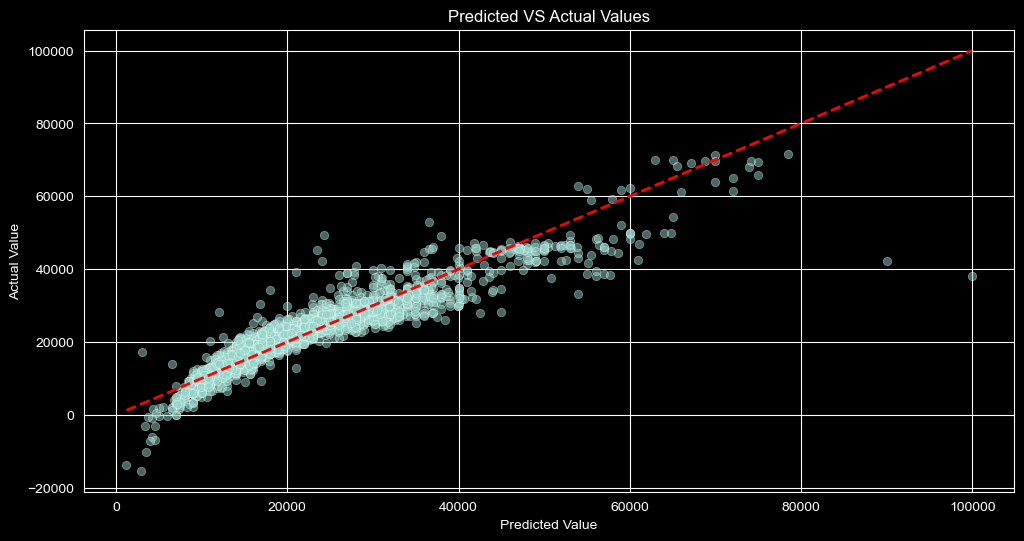

In [37]:
#visualizing prediction vs actual price
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test,y=y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'--r',linewidth=2)
plt.title('Predicted VS Actual Values')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

above plot shows actual vs predicted.almost all of the dots are near the regression line which means x(y_pred)=y(y_test) except 2 or 3 outliers so the prediction is good but not perfect.

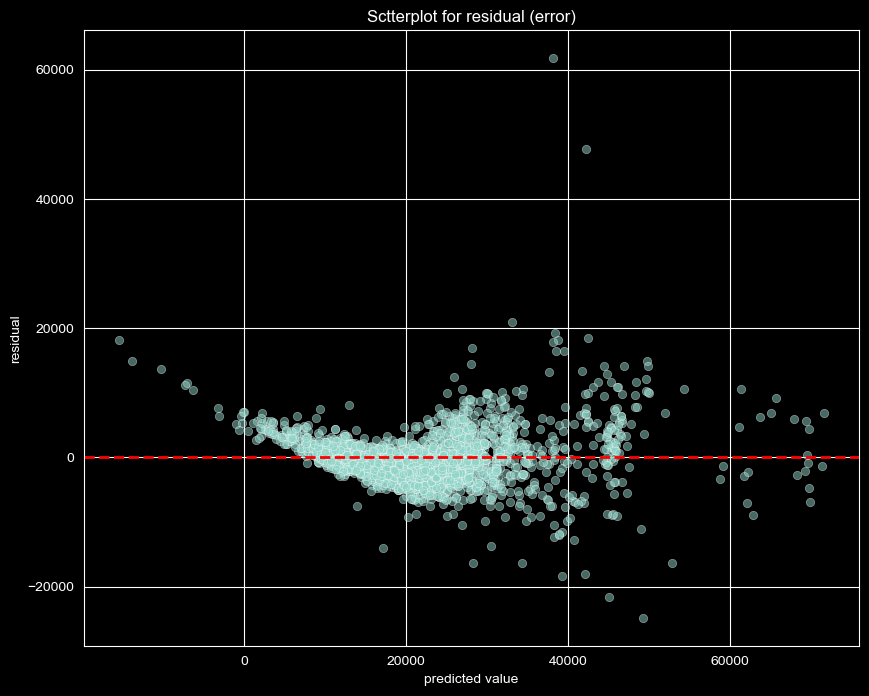

In [39]:
#visualizing error
residual=y_test-y_pred
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_pred,y=residual,alpha=0.5)
plt.axhline(y=0,color='r',linestyle='--',linewidth=2)
plt.title('Sctterplot for residual (error)')
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.show()


this plot shows residual (error) or test-prediction so it shows error we can see that the dots are tightly packed around starting meaning the model is confodent in predicting lower price points but then points are widely distributed for the higher price points whcih means the model has quite a few mistakes for higher prices due to various reasons. Instead of predicting price, you predict log(price).

In [47]:
#again model trainign but with log transformation for price
y_log_train=np.log1p(y_train)
model_pipeline.fit(X_train,y_log_train)

y_pred_log=model_pipeline.predict(X_test)
#converting the pred to original scale as we did log for price the prediction will be smaller unit so convert to original unit
y_pred_original=np.expm1(y_pred_log)
#performance results
print(f"mean absolute error:{mean_absolute_error(y_test,y_pred_original):.4f}")
print(f"r score:{r2_score(y_test,y_pred_original):.4f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_original):.4f}")

mean absolute error:2172.0238
r score:0.9025
Mean Absolute Percentage Error: 0.0954


the mean absolute error is 2172 meaning prediction is off by 2172 pounds also our mape is 0.09 meaning prediction is off by 9%
90% of the variation in BMW prices is explained by the features in our model. The remaining 15% is due to factors we haven't measured (like car color, service history, or leather interior).

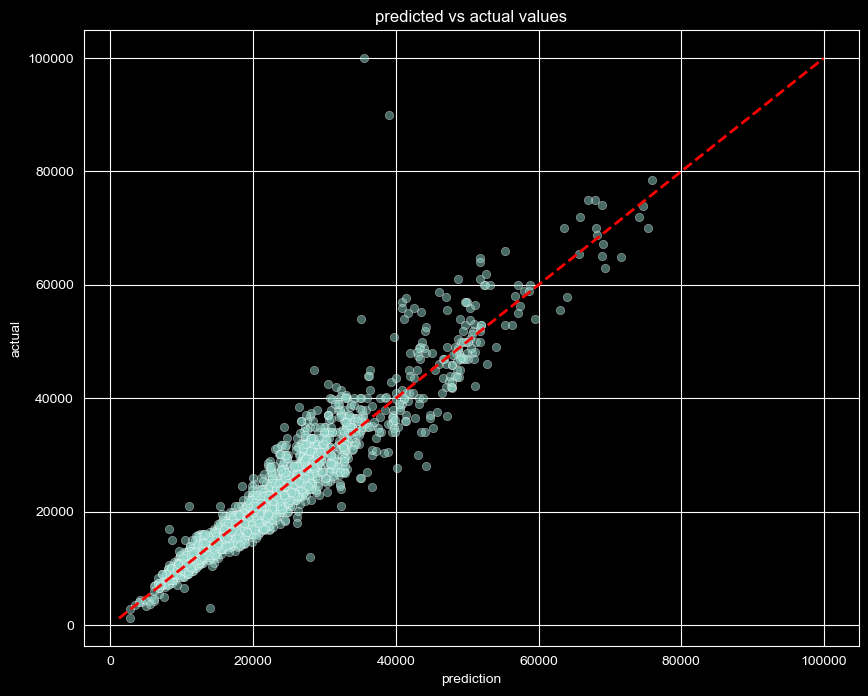

In [44]:
#again visualizing
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_pred_original,y=y_test,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'--r',linewidth=2)
plt.title('predicted vs actual values')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

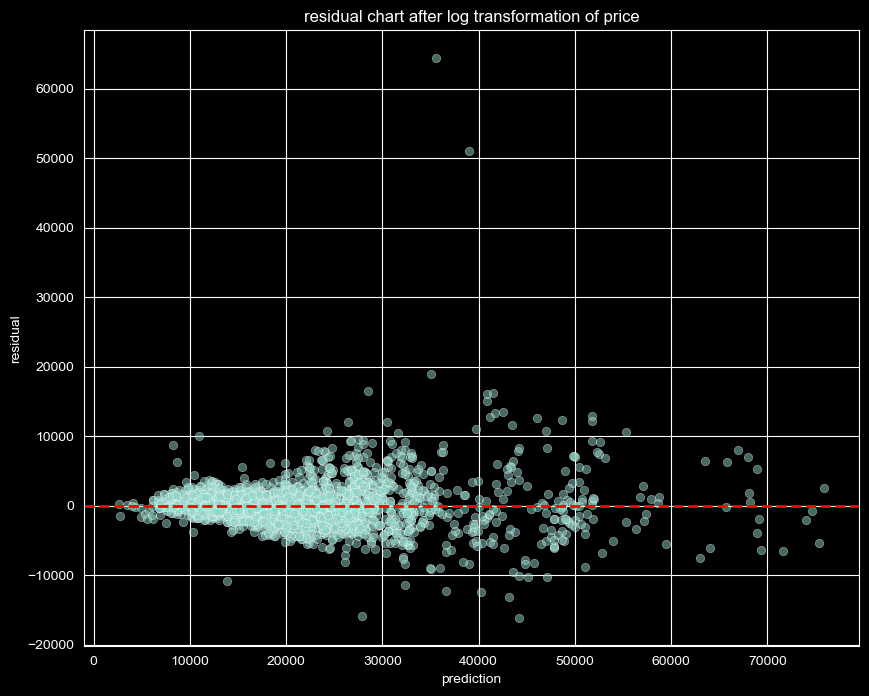

In [45]:
residual=y_test-y_pred_original
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_pred_original,y=residual,alpha=0.5)
plt.axhline(y=0,color='r',linestyle='--',linewidth=2)
plt.title('residual chart after log transformation of price')
plt.xlabel('prediction')
plt.ylabel('residual')
plt.show()